In [40]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn import model_selection as ms
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
dictionary = pickle.load(
    open("../final_project/final_project_dataset_modified.pkl", "rb"))

In [4]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit(data)

In [14]:
features_train,\
features_test,\
labels_train,\
labels_test = ms.train_test_split(features, target, test_size=0.5,
                                  random_state=42)

In [42]:
reg = linear_model.LinearRegression()

In [43]:
reg.fit(features_train, labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
train_colour, test_colour = 'b','r'

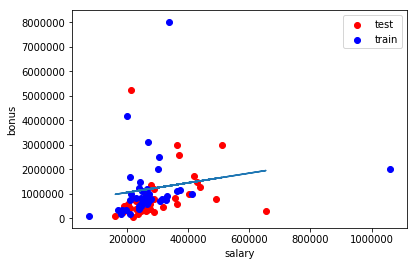

In [44]:
### draw the scatterplot, with color-coded training and testing points
'''
ORIGINAL CODE
for feature, target in zip(features_test, labels_test):
    plt.scatter( feature, target, color=test_colour ) 
for feature, target in zip(features_train, labels_train):
    plt.scatter( feature, target, color=train_colour )
'''

plt.scatter([f[0] for f in features_test], labels_test, color=test_colour,
            label='test')
plt.scatter([f[0] for f in features_train], labels_train, color=train_colour, 
            label='train')
plt.legend()
### draw the regression line, once it's coded
try:
    plt.plot(features_test, reg.predict(features_test))
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show();

In [46]:
reg.coef_, reg.intercept_

(array([1.97017287]), 662220.4176015807)

In [48]:
reg.score(features_train, labels_train), reg.score(features_test, labels_test)

(0.04164573226747781, -0.04471207836147806)